## CREDIT CARD FRAUD DETECTION CLASSIFIER

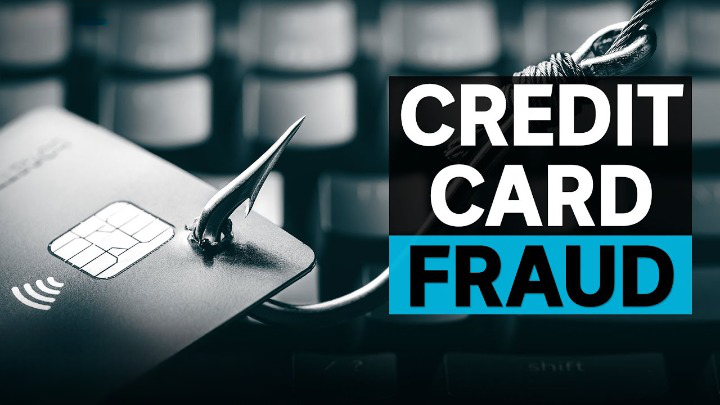

# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0; border-radius: 10px; border: 2px solid #58D68D; font-size: 20px; color: #2E4053; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">1: Import Libraries</p>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import os

import warnings
warnings.filterwarnings('ignore')

# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0 ; border-radius: 10px; border: 2px solid #58D68D; font-size: 20px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">2: Load Dataset </p>

In [2]:
#changing the directory
os.chdir("C://Users//HP//OneDrive//Desktop//My Capstone project")

In [3]:
# importing the test and train dataset
data = pd.read_csv("creditcard.csv")

In [4]:
# making a copy of orignal dataset
df = data.copy()

In [5]:
#pd.set_option("display.max_columns",31)

In [6]:
# displaying first five rows of dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0; border-radius: 10px; border: 2px solid #58D68D; font-size: 20px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3: Data Prepration</p>
 - 3.0 Data Preparation<br>
 - 3.1 Understainding the data <br>
 - 3.2 Descriptive Statistics <br>
 - 3.3 Exploratory Data Analysis <br>
 - 3.4 Missing value Treatment <br>
 - 3.5 Outlier Treatment <br>
 - 3.6 Encoding <br>
 - 3.7 Feature Scaling <br>
 - 3.8 Checking Imbalanced Data <br>
 
 - 4.0 Splitting the dataset<br>
 - 5.0 Model Building<br>
 - 5.1 Logistic Regression<br>
 - 5.2 Decision Tree<br>
 - 5.3 XGBoost<br>
 - 5.4 ROC <br>
 - 5.5 Hyperparameter Tunning<br>
 - 6.0 Result

# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0; border-radius: 10px; border: 2px solid #58D68D; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.1: Understanding the Data</p>

In [7]:
# checking the dtypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

`On using info() function we can check if any of the columns contain null values and also verify the datatypes of each columns. Looking at the output it can be seen that all the 31 columns have non-null values and datatpyes of each column is also correct.`

In [8]:
# checking the No. of duplicate values in dataset
df.duplicated().sum()

1081

In [9]:
# dropping the duplicates in dataset
df.drop_duplicates(inplace = True)

In [10]:
# checking the No. of duplicate values in dataset
df.duplicated().sum()

0

<div style="background-color: #E8FEF0; padding: 20px; border-left: 4px solid #5e72e4;border-right: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    
<b>Inference</b>:<br>
<ul style="list-style-type: square; color: #004085;">
    <li>The dataset contains <b>284807</b> entries.</li>
    <li>Each entry represents a transaction as fraudulent or non-fraudulent.</li>
    <li>There are <b>31</b> columns in the dataset.</li>
    <li>The columns represent various features:</li>
    <ul style="list-style-type: disc; color: #004085;">
        <li>As, it contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data could not be provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'</li>
        <li>'Time' contains the seconds elapsed between each transaction and the first transaction.</li>
        <li>'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.</li>
        <li>'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.</li>
    </ul>
        <li>There are no missing values in columns.</li>
    <li>There were duplicates <b>1081</b> in several rows and we have deopped them.</li>
    <li>Now, the dataset contains <b>283726</b> entries.</li>
    <li>The target variable is '<b>Class</b>', which represents the 1 in case of fraud and 0 for not fraud .</li>
</ul>
    
</div>


In [11]:
#length of the dataset
len(df)

283726

In [12]:
# shape of the dataset
df.shape

(283726, 31)

###### The following are the names of the columns of the dataset. In total there are 31 columns.

In [13]:
# No. of columns in dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
# Count of total columns in dataset
len(df.columns)

31

# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0; border-radius: 10px; border: 2px solid #58D68D; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.2: Descriptive Statistics</p>

`The describe() function generates descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution, excluding NaN values.`

In [15]:
# statistics summary for Numerical Features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


<div style="background-color: #F5EEE6; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <b>Inference</b>:<br>
    <ul style="list-style-type: square; color: #004085;">
        <li><b>Time:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average time in seconds elapsed between each transaction and the first transaction is approximately <b>94811 sec</b>, with a considerable standard deviation of <b>47481.04</b>.</li>
                <li>The maximum time reported in seconds is significantly high at <b>172792 sec</b>, which could represent outliers.</li>
            </ul>
        </li>
        <li><b>Amount:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The average amount is approximately <b>\$88.47</b>, with a standard deviation of <b>\$250.39</b>. This signifies the range of transaction Amount.</li>
                <li>Amount range from <b>\$0.00</b> to <b>\$25691.160</b>, with most falling between <b>\$5.60</b> and <b>\$77.51</b>. This indicates variability in transaction amount.</li>
            </ul>
        </li>
    </ul>
</div>


# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0; border-radius: 10px; border: 2px solid #58D68D ; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.3: Exploratory Data Analysis</p>

#### Observe the distribution of classes with time

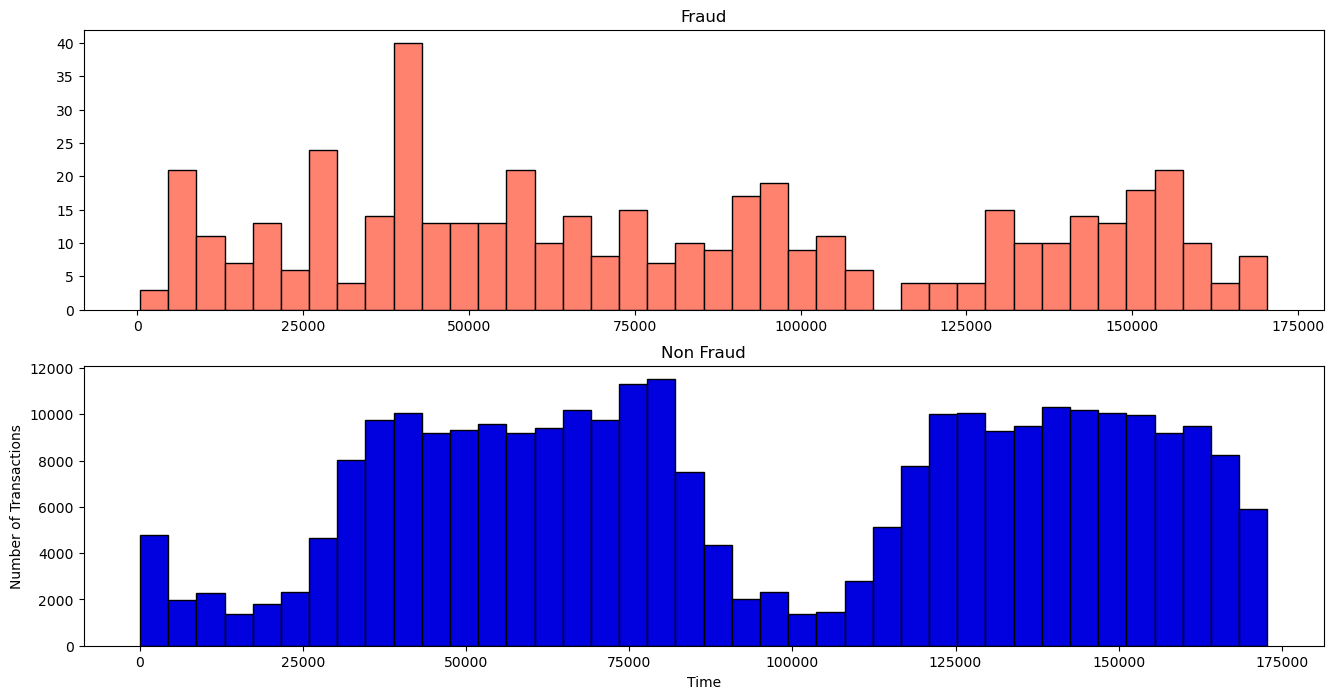

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(16,8))

ax1.hist(df.Time[df.Class == 1], bins = 40, color= "#ff826e" ,edgecolor='black')
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = 40, color = "#0101DF" ,edgecolor='black')
ax2.set_title('Non Fraud')

plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()

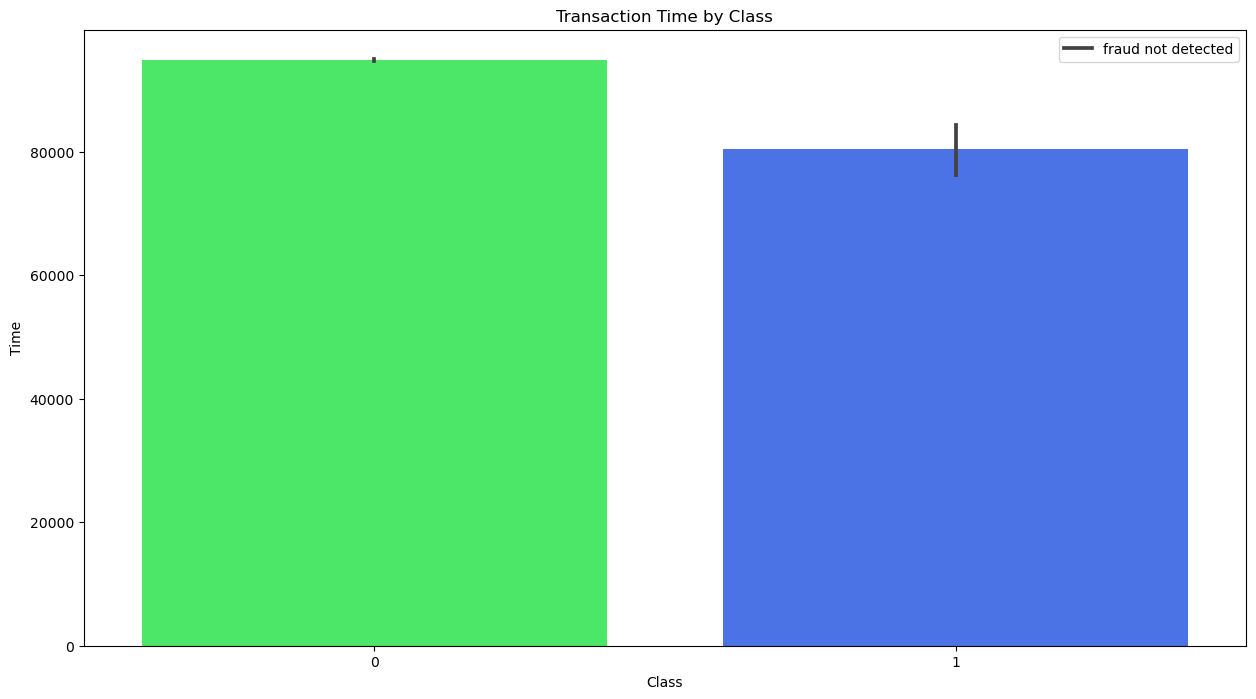

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, y = 'Time',x='Class', palette = ["#33FF57", "#3366FF"])
plt.title('Transaction Time by Class')
plt.legend(["fraud not detected"])
plt.show()

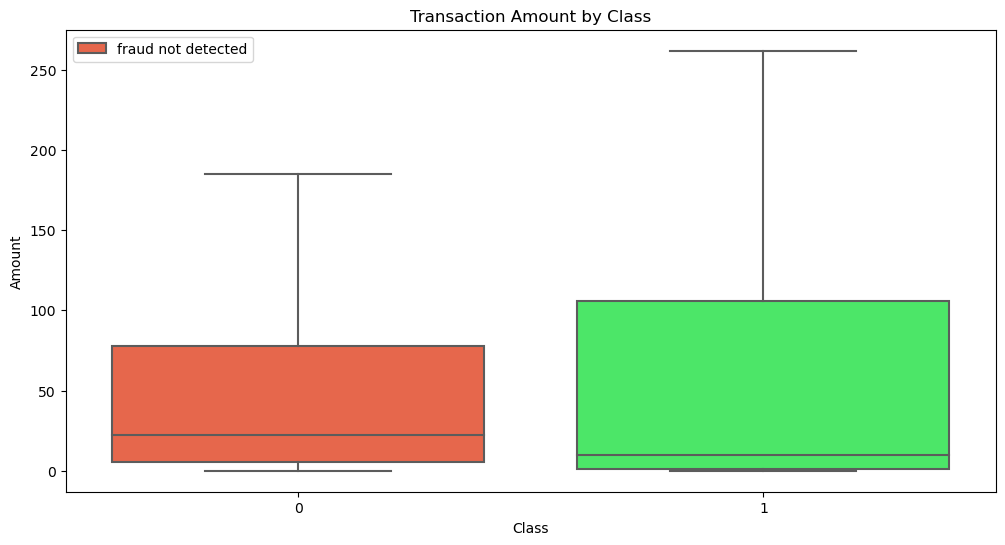

In [18]:
#Box plots for 'Amount' and 'Time' by Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False, palette = ["#FF5733", "#33FF57"])
plt.title('Transaction Amount by Class')
plt.legend(["fraud not detected"])
plt.show()

#### Observe the distribution of classes with amount

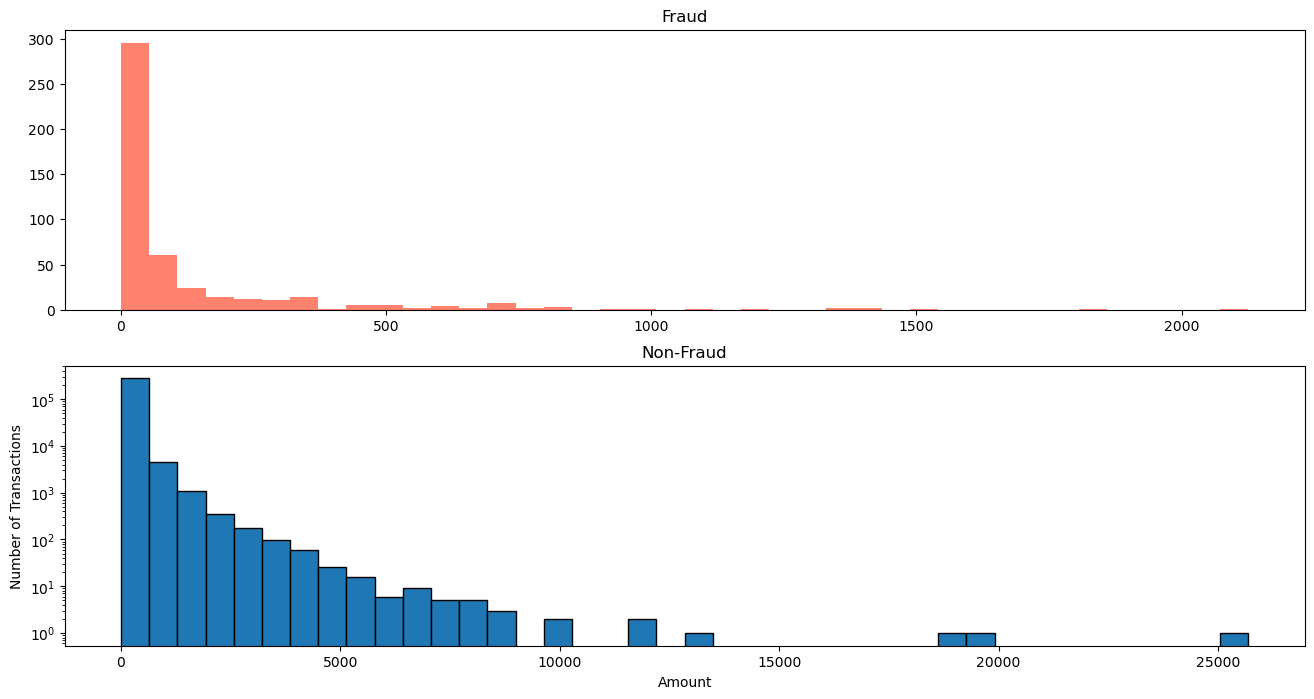

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(16,8))

ax1.hist(df.Amount[df.Class == 1], bins = 40, color = "#ff826e")
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = 40, edgecolor='black')
ax2.set_title('Non-Fraud')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

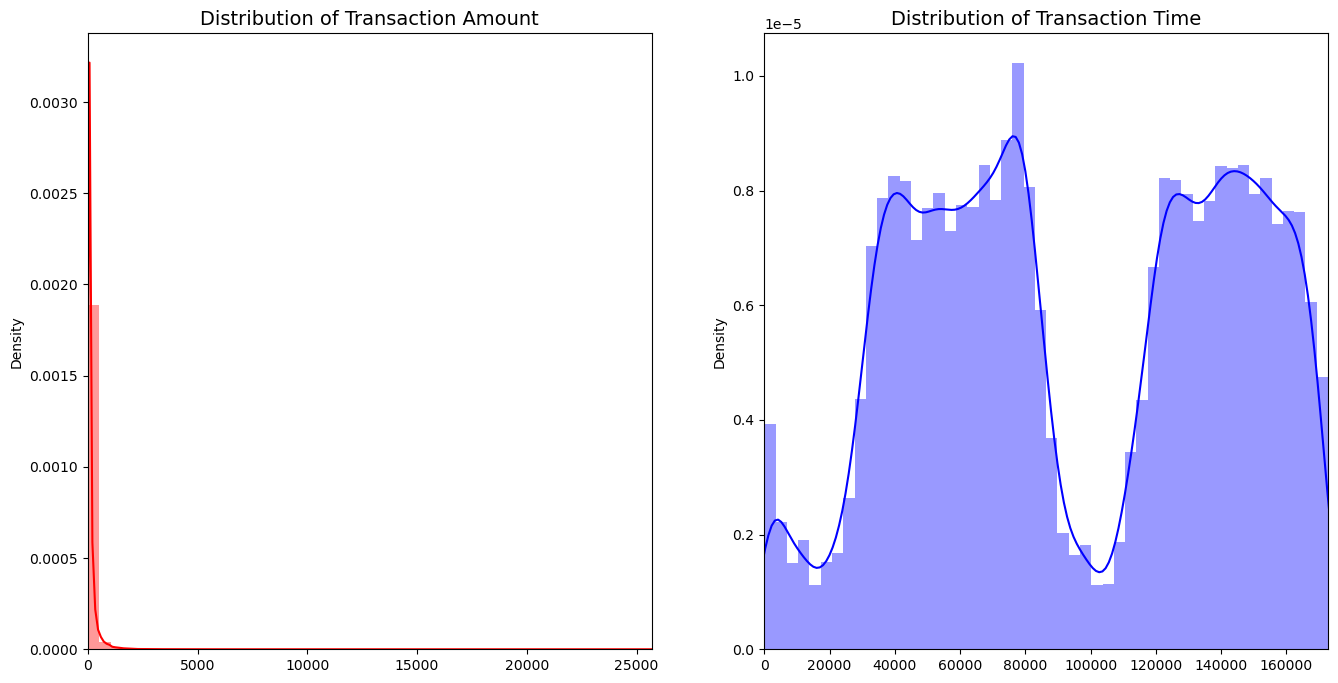

In [20]:
#Plots for Amount and Time variable
fig, ax = plt.subplots(1, 2, figsize=(16,8))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

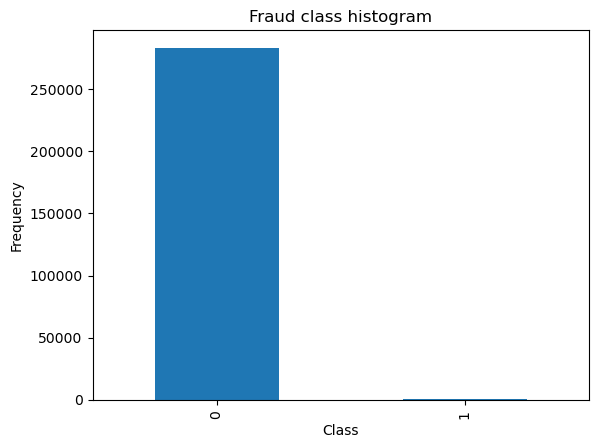

In [21]:
# Barplot of "Class" variable to see how many transactions were fraud or not
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')

plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

`Clearly the data is totally imbalanced!!`

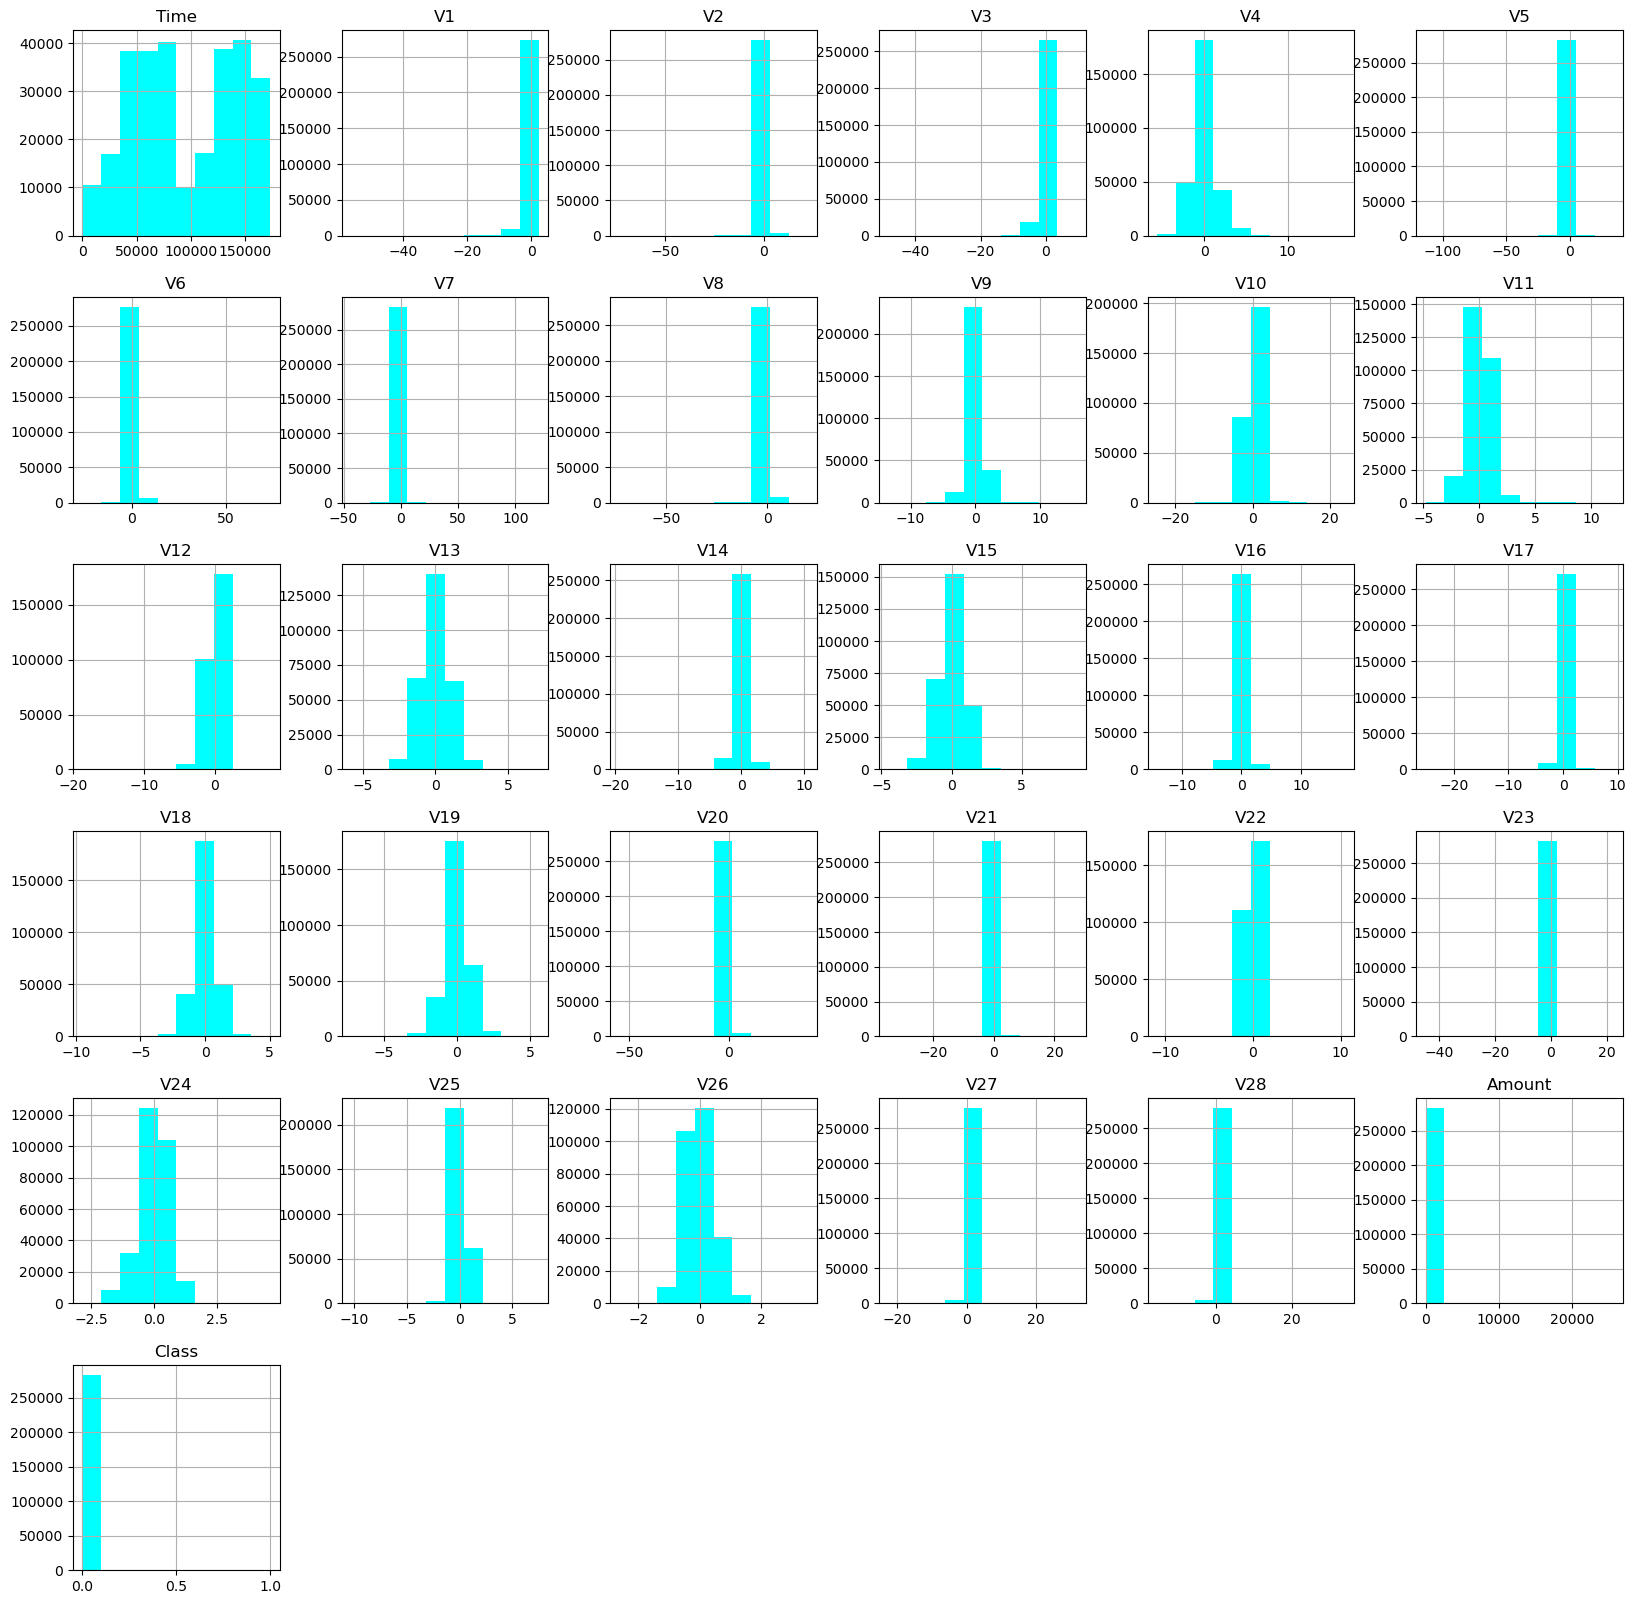

In [22]:
# Histogram of all columns
df.hist(figsize=(20,20),color='cyan')
plt.show()

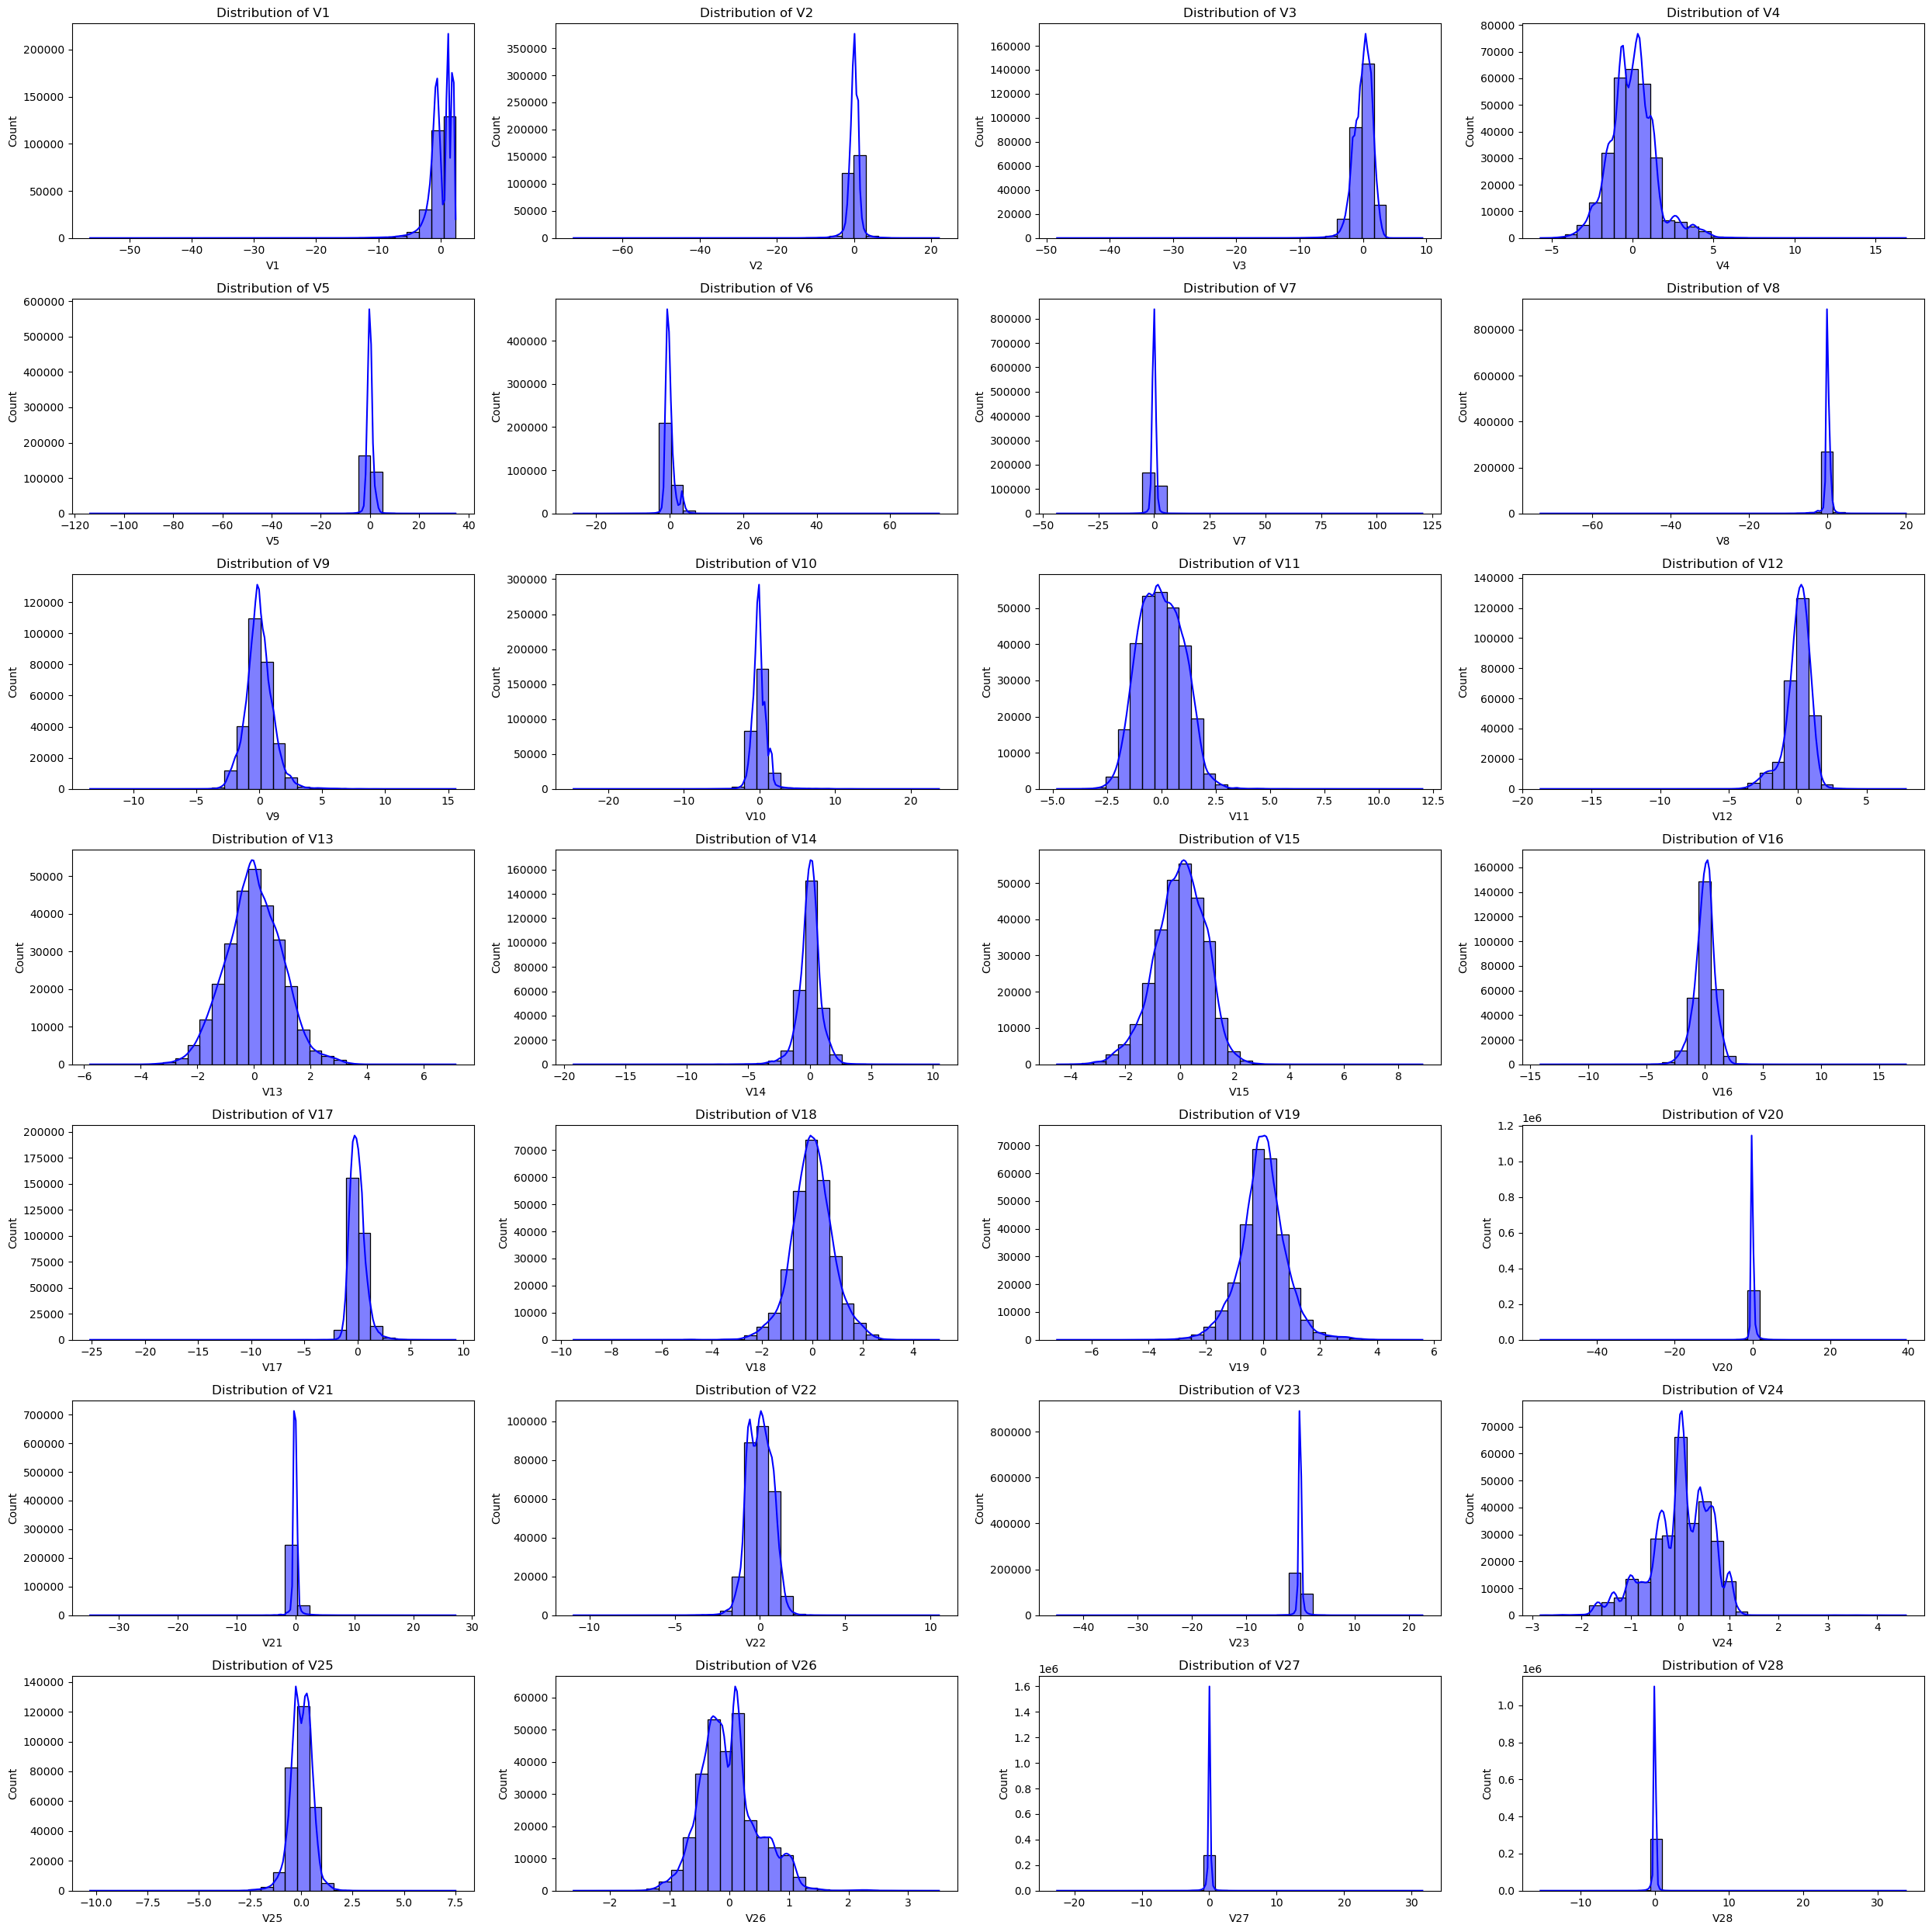

In [23]:
# Explore feature distributions
plt.figure(figsize=(25, 25))
for i in range(1, 29):  # Assuming V1 to V28 are the feature columns
    plt.subplot(7, 4, i)
    sns.histplot(df[f'V{i}'], bins=30, kde=True,color = 'blue')
    plt.title(f'Distribution of V{i}')
plt.tight_layout()
plt.show()

# <p id="1" style="text-align: left; padding: 20px; background-color: #66b3ff; border-radius: 10px; border: 2px solid #58D68D; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> Correlation and Heatmap </p>

In [25]:
# Correlation
df_corr = df.corr()
df_corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


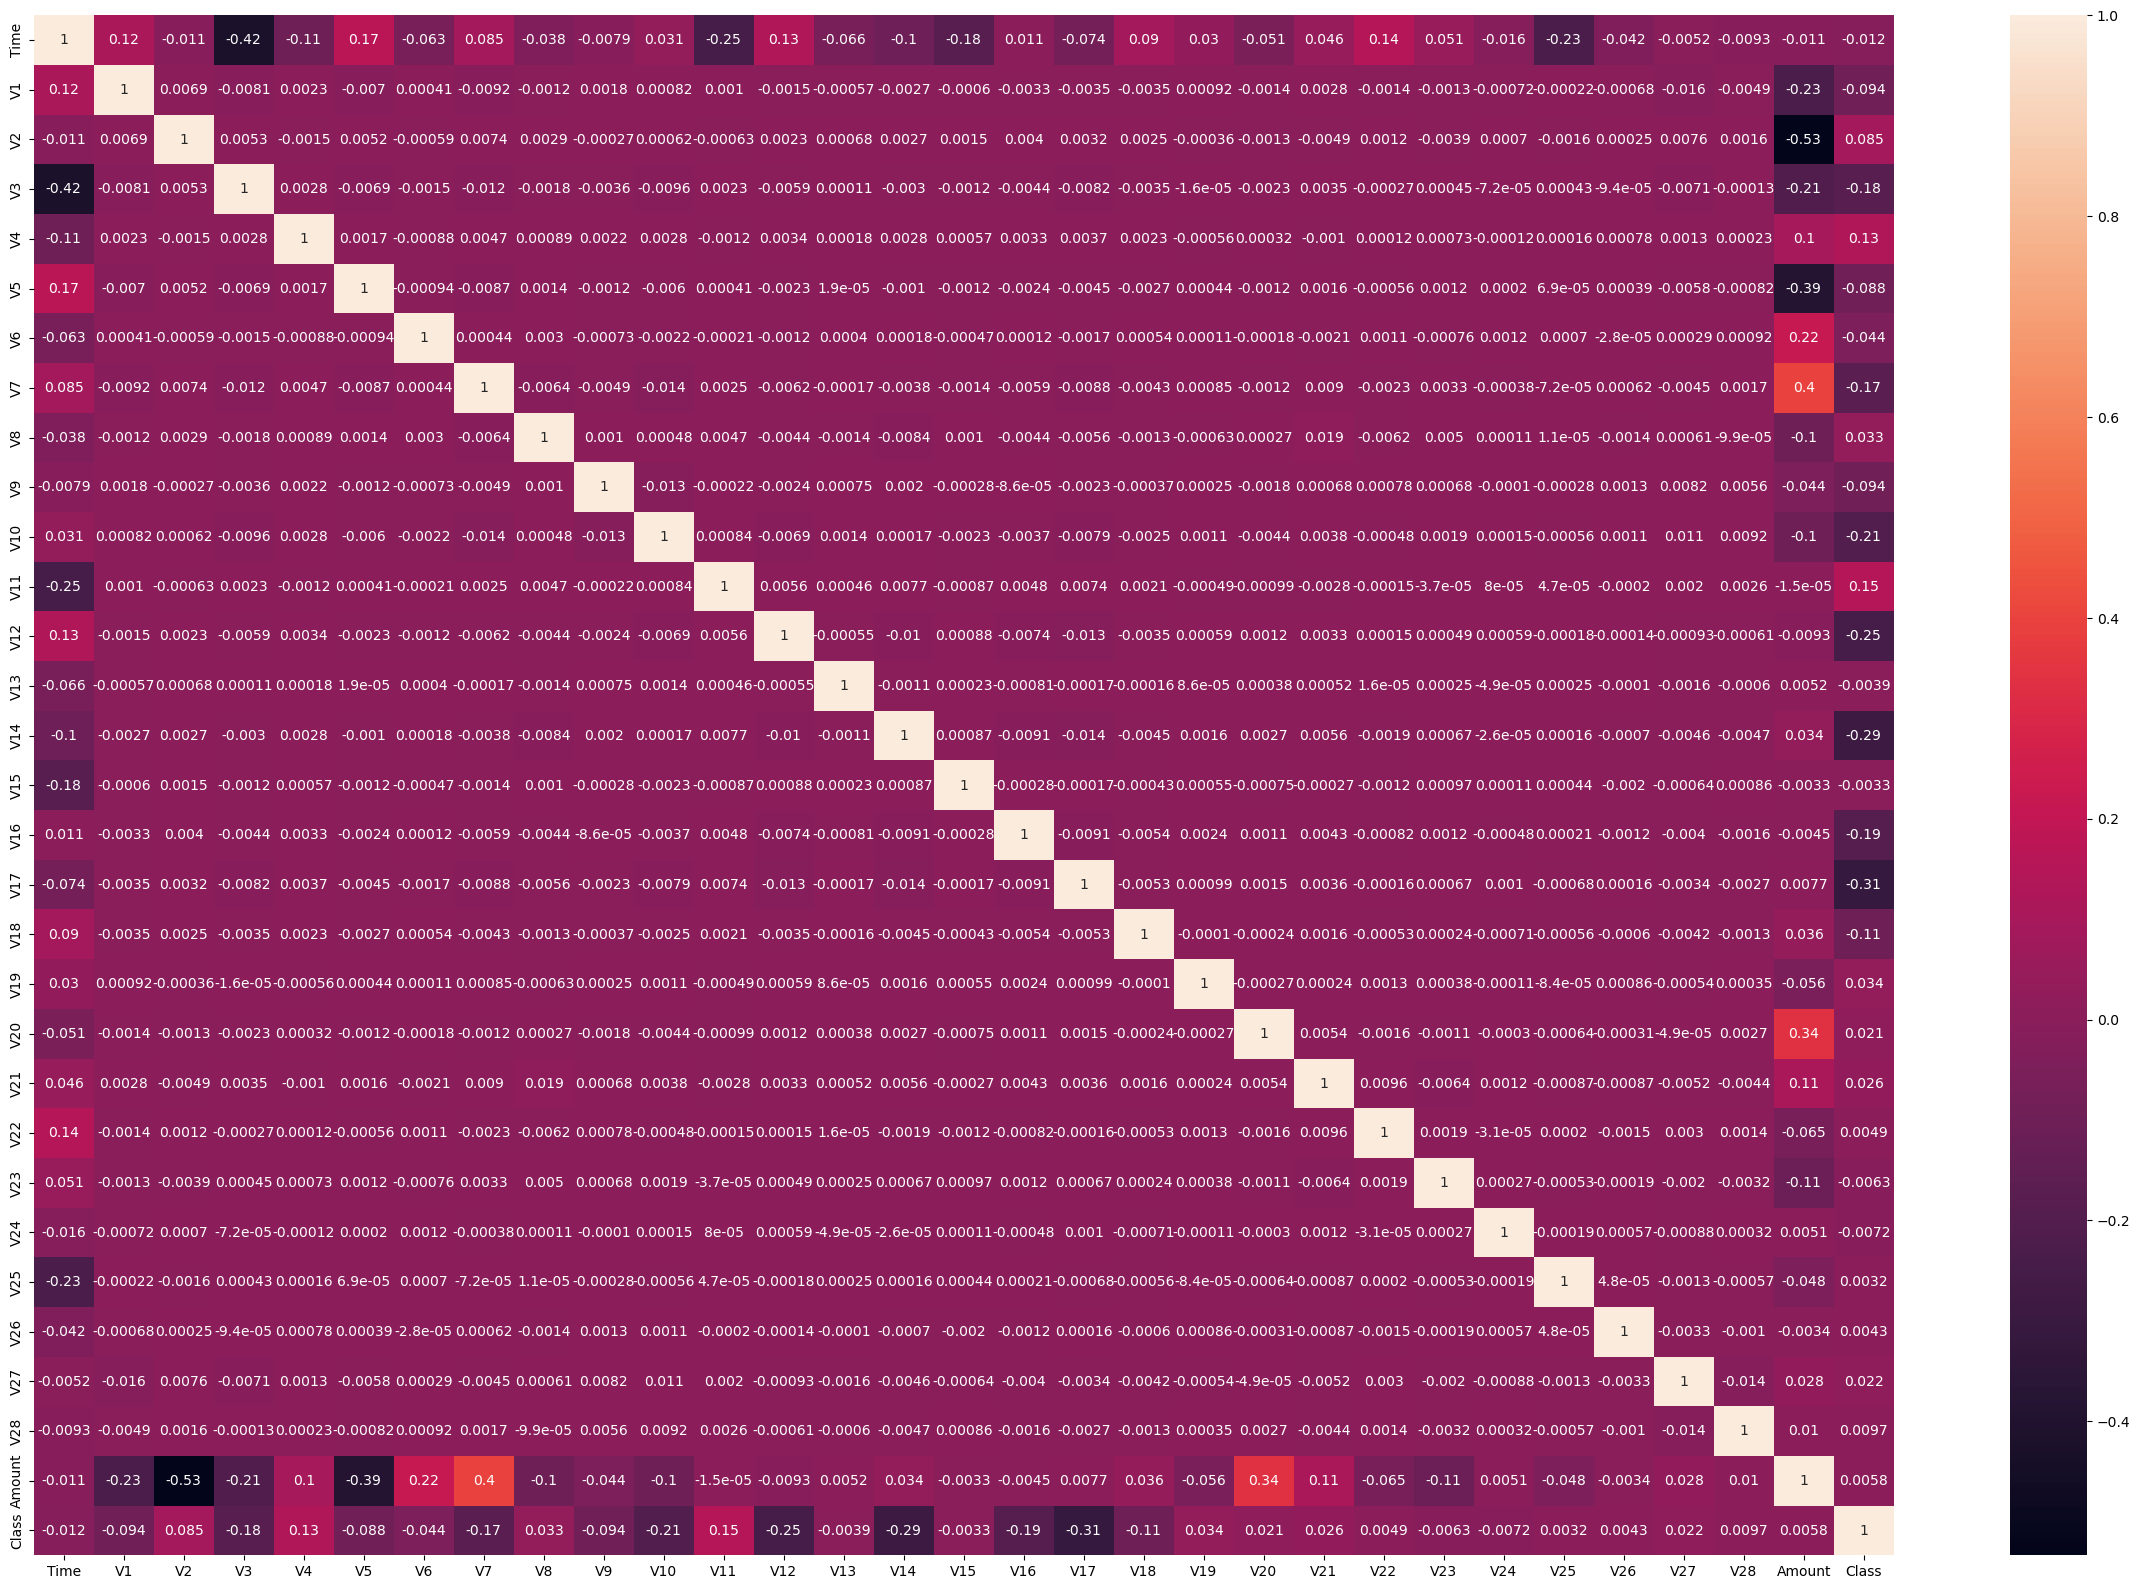

In [26]:
#heat map
plt.figure(figsize=(30,20))
sns.heatmap(df_corr, annot=True)
plt.show()

# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0; border-radius: 10px; border: 2px solid #58D68D; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.4: Missing Value Treatment</p>

In [24]:
# missing values in dataset
#pd.DataFrame(df.isnull().sum())
df.isnull().sum()/len(df)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

### `There are no missing values in this dataset.`

# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0; border-radius: 10px; border: 2px solid #58D68D; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.5: Outliers Treatment</p>

`Not performing any outliers treatment for this dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.`

# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0; border-radius: 10px; border: 2px solid #58D68D; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.6: Encoding</p>

<div style="background-color:#E8F0FE ; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <p><strong>Categorization of Features for Encoding:</strong></p>
    <ul style="list-style-type: square; color: #004085;">
    <p>After analyzing the dataset, we can categorize the features into three groups:</p>
    <ol>
        <li><strong>No Encoding Needed:</strong> These are the features that do not require any form of encoding because they are already in a numerical format that can be fed into a model.</li>
        <li><strong>One-Hot Encoding:</strong> This is required for nominal variables, which are categorical variables without any intrinsic order. One-hot encoding converts each unique value of the feature into a separate column with a 1 or 0, indicating the presence of that value.</li>
        <li><strong>Label Encoding:</strong> This is used for ordinal variables, which are categorical variables with a meaningful order. Label encoding assigns a unique integer to each category in the feature, maintaining the order of the values.</li>
    </ol>
    </ul>
</div>

`Not performing any encoding for this dataset. Because all the columns are numerical format.`

# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0; border-radius: 10px; border: 2px solid #58D68D; font-size: 18px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.7: Feature Scaling</p>


`We need to scale the Amount and time variables using Standard Scaler and all other columns are already scaled by the PCA transformation.`

In [27]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

# Fit the data into scaler and transform
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

# <p  style="text-align: center; padding: 14px; font-size: 20px; background-color: #FDEBD0; color: #1A202C; border: 2px solid #58D68D; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3.8: Checking Imbalanced Data</p>

In [28]:
# counts of categories in loan_status
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

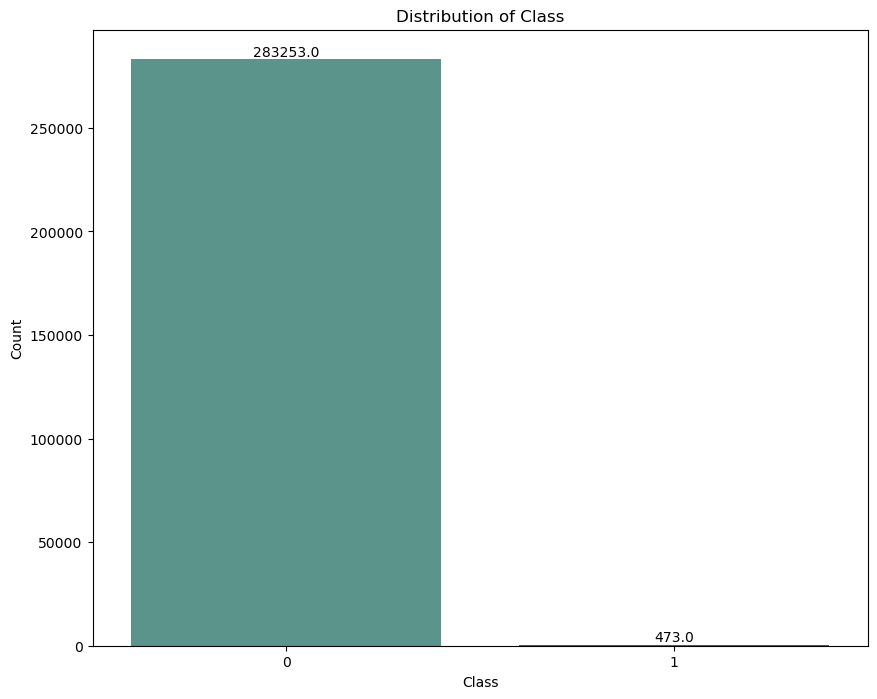

In [29]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Class', data=df, palette='crest')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<div style="background-color: #F5EEE6; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <ul style="list-style-type: square; color: #004085;">
    The bar plot shows the number of fraud and genuine transaction in the dataset. Approximately 283253 of the class was genuine transaction, and 473 were fraud transactions. This indicates that there is high imbalance in the target variable.
    To address this, we will use <b>SMOTE (Synthetic Minority Over-sampling Technique)</b>. SMOTE is a technique used to generate synthetic samples for the minority class in order to balance the class distribution in the dataset. By creating synthetic samples, SMOTE helps mitigate the impact of class imbalance and improves the performance of machine learning models in predicting the minority class.
    </ul>
</div>

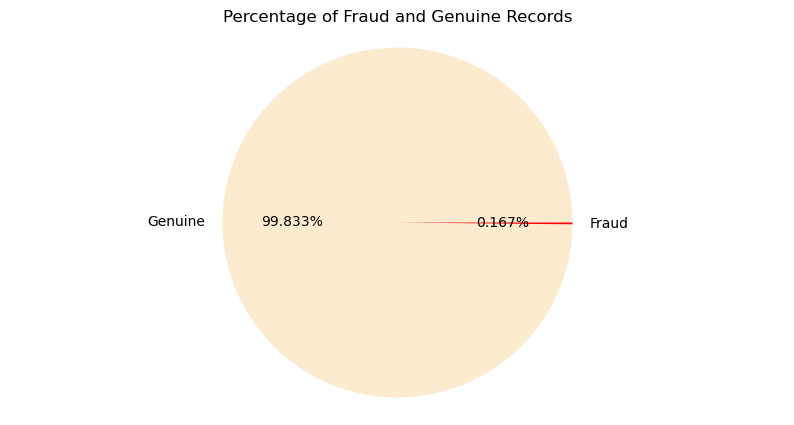

In [30]:
#find percentage of fraud/non_fraud records
fraud_percentage = (df.groupby('Class')['Class'].count() / df['Class'].count()) * 100

plt.figure(figsize=(10, 5))
plt.pie(fraud_percentage, labels=['Genuine', 'Fraud'], autopct='%0.3f%%', colors=['#FDEBD0','red'])
plt.title('Percentage of Fraud and Genuine Records')
plt.axis('equal')
plt.show()

`Genuine transactions make up approximately 99.833% of the dataset, while fraudulent transactions represent only 0.167%.`

In [31]:
# separating the data for analysis
gen = df[df.Class == 0]
fraud = df[df.Class == 1]

In [32]:
# checking the shapes of genuine and fraud transaction
print(gen.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


# <p  style="text-align: left; padding: 14px; font-size: 18px; color: #1A202C; background-color: #E8F0FE; border: 2px solid #58D68D; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);"> Handling Imbalanced Data</p>

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE (sampling_strategy='minority', random_state=42)

# Fitting the model to generate the data.
oversampled_X, oversampled_Y = sm. fit_resample(df.drop('Class', axis=1), df['Class'])
oversampled = pd. concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)],axis=1)

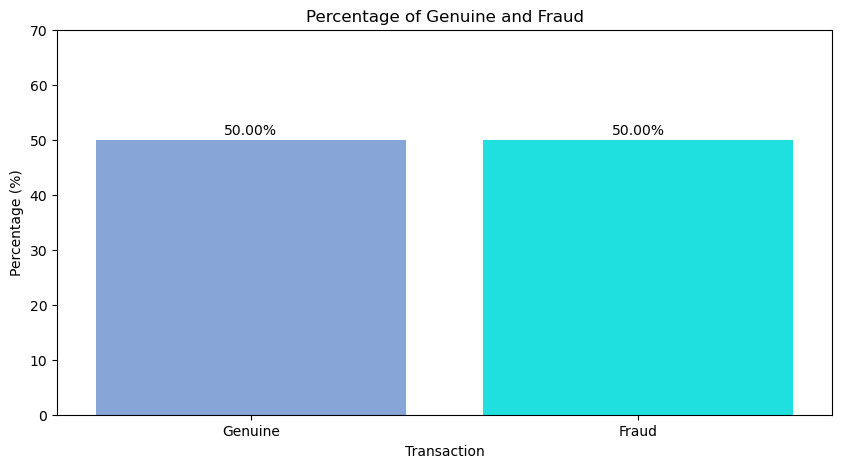

In [34]:
# Calculating the percentage of each class
percentage = oversampled['Class'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['#7AA2E3', 'cyan'])
plt.title('Percentage of Genuine and Fraud')
plt.xlabel('Transaction')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Genuine','Fraud'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

In [35]:
oversampled.Class.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

<div style="background-color: #F5EEE6; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <ul style="list-style-type: square; color: #004085;">
         <li><strong>Using Oversampling:</strong> Oversampling (SMOTE) is used instead of undersampling because the difference between the two classes( 0 and 1) is huge, so if undersampling  techniques is used, it will lead to losing of most of the sensitive information from the data. Therefore, to overcome that oversampling is used.</li>
           </ul>
</div>

# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0; border-radius: 10px; border: 2px solid #58D68D ; font-size: 20px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">4: Splitting the Training Dataset</p>

In [36]:
#input and output variables
X=oversampled.drop(["Class"],axis=1)
y=oversampled["Class"]

In [37]:
# split the data into train and train data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True , random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((453204, 30), (113302, 30), (453204,), (113302,))

# <p id="1" style="text-align: center; padding: 20px; background-color: #FDEBD0; border-radius: 10px; border: 2px solid #58D68D; font-size: 20px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">5: Model Building</p>

- Logistic Regression Model<br>
-  Decision Tree Model<br>
- Xgboost

# <p id="1" style="text-align: center; padding: 15px; background-color:  #FDEBD0; font-size: 18px; border-radius: 10px; color: #1A202C;border: 2px solid #58D68D;  box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">5.1: Logistic Regression Model</p>

In [39]:
# Importing Library
from sklearn.linear_model import LogisticRegression

In [40]:
# Fitting the model
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [41]:
# Prdeicting the model
prediction=logistic.predict(X_test)
prediction

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
# confusion matrix
cm1=confusion_matrix(y_test,prediction)
cm1

array([[54996,  1467],
       [ 4735, 52104]], dtype=int64)

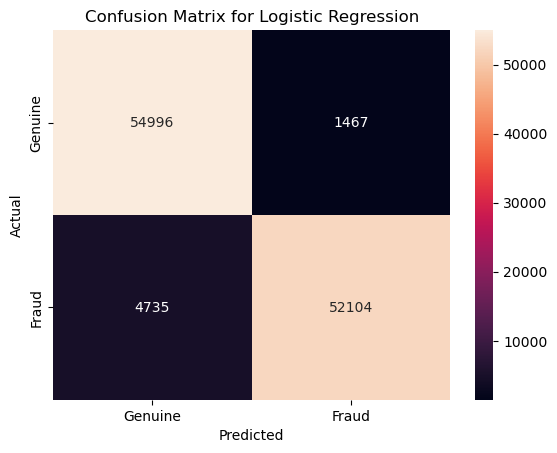

In [44]:
cm = confusion_matrix(y_test, prediction)
labels = ['Genuine', 'Fraud']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [45]:
# calculating the accuracy
accuracy_score(y_test,prediction)

0.9452613369578649

In [46]:
# Classification Report
cl_report = classification_report(y_test, prediction, target_names = ['Genuine', 'Fraud'])
print("Logistic Regression Classification Report:")
print(cl_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Genuine       0.92      0.97      0.95     56463
       Fraud       0.97      0.92      0.94     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302



In [47]:
# ACCURACY OF Logistic Regression
from sklearn import metrics
accuracyList=[]
modelList=[]

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test,prediction))
accuracyList.append(metrics.accuracy_score(y_test, prediction))
modelList.append("Logistic Regression")

Accuracy: 0.9452613369578649


In [48]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm1
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precisionList=[]
recallList=[]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.9726157809262475
recall 0.9166945231267264


In [49]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(prediction , y_test))) 
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , prediction)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , prediction)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.94526
Precision : 0.97262
Recall : 0.91669




<div style="background-color: #C0D6E8 ; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>Logistic Regression Model Evaluation </h3>
    <ul style="list-style-type: square; color: #004085;">
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>94.52%</td>
            <td>The model correctly predicted transactions  for 94.52% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Fraud)</td>
            <td>97.26%</td>
            <td>Out of all class as fraud, only 97.26% were actually fraud.</td>
        </tr>
        <tr>
            <td>Recall (Fraud)</td>
            <td>91.66%</td>
            <td>The model identified 94.66% of the actual fraud transaction.</td>
        </tr>
      </table>
    
   <p>
       The evaluation of the Logistic Regression model in the class domain reveals its performance in predicting fraud transaction. While it achieved an accuracy of 94.52%, indicating overall correctness. </p>
    </ul>

</div>


# <p id="1" style="text-align: center; padding: 15px; background-color:  #FDEBD0; font-size: 18px; border-radius: 10px; color: #1A202C; border: 2px solid #58D68D; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">5.2:  Decision Tree Model </p>

In [50]:
# importing libarary
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [51]:
#Applying the Decision Tree on the training dataset
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [52]:
#Running the model on the test dataset
y_pred_ini = dt_model.predict(X_test)

### Check the accuracy of the model

In [53]:
#Importing all the functions to for checking the accuracies
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [54]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ini)

0.9982524580325148

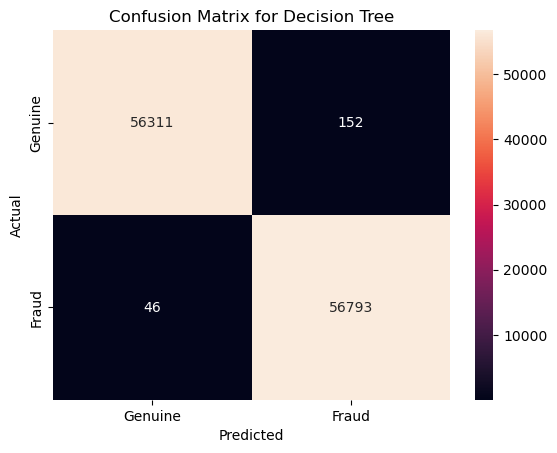

In [55]:
#Using confusion matrix we are checking the accuracy on the testing dataset
cm = confusion_matrix(y_test, y_pred_ini)
labels = ['Genuine', 'Fraud']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [56]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = dt_model.predict(X_train)

In [57]:
#Checking the accuracy of training dataset 
accuracy_score(y_train,y_pred_train)

1.0

In [58]:
#Checking the accuracy of testing dataset
accuracy_score(y_test,y_pred_ini)

0.9982524580325148

In [59]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_ini , y_test))) 
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ini)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ini)))
# print('Confusion Matrix : \n', cnf_matrix)


Accuracy :0.99825
Precision : 0.99733
Recall : 0.99919


In [60]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precisionList=[]
recallList=[]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.9973307577487049
recall 0.9991906965287919


<div style="background-color: #C0D6E8 ; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>Decision Tree Model Evaluation </h3>
    <ul style="list-style-type: square; color: #004085;">
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>99.82%</td>
            <td>The model correctly predicted transactions for 99.82% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Fraud)</td>
            <td>99.73%</td>
            <td>Out of all class as fraud, only 99.73% were actually fraud.</td>
        </tr>
        <tr>
            <td>Recall (Fraud)</td>
            <td>99.91%</td>
            <td>The model identified 99.91% of the actual fraud transaction.</td>
        </tr>
      </table>
    </ul>

</div>


# <p id="1" style="text-align: center; padding: 15px; background-color:  #FDEBD0; font-size: 18px; border-radius: 10px; color: #1A202C; border: 2px solid #58D68D; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">5.3:  XGBoosting Model</p>

In [1]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [62]:
import xgboost as xgb

In [63]:
#Define the model 
xgb_cal=xgb.XGBClassifier( n_estimators = 10)
xgb_cal

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
# Fit  from the model
xgb_cal.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
#predict the model
preds = xgb_cal.predict(X_test)
preds

array([1, 0, 0, ..., 1, 0, 0])

In [66]:
# ACCURACY OF Xgboost
from sklearn import metrics
# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, preds))
accuracyList.append(metrics.accuracy_score(y_test, preds))
modelList.append("XGBoost")

Accuracy: 0.9828687931369261


In [67]:
#import the confusion matrix from scikit learn
from sklearn.metrics import confusion_matrix
#create the confusion matrix
cm = confusion_matrix(y_test, preds)
cm

array([[55814,   649],
       [ 1292, 55547]], dtype=int64)

In [68]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.9884511353121218
recall 0.9772691285912841


<div style="background-color: #58D68D; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>XgBoost Model Evaluation </h3>
    <ul style="list-style-type: square; color: #004085;">
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>98.28%</td>
            <td>The model correctly predicted transactions for 98.28% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Fraud)</td>
            <td>98.84%</td>
            <td>Out of all transactions as fraud, only 98.84% were actually fraud.</td>
        </tr>
        <tr>
            <td>Recall (Fraud)</td>
            <td>97.72%</td>
            <td>The model identified 97.72% of the actual fraud transactions.</td>
        </tr>
      </table>
    </ul>
</div>

# <p id="1" style="text-align: center; padding: 15px; background-color:  #FDEBD0; font-size: 18px; border-radius: 10px; color: #1A202C; border: 2px solid #58D68D; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">5.4: ROC Curve</p>

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [70]:
lr_probs = logistic.predict_proba(X_test)[:, 1]
dt_model_curve = dt_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_cal.predict_proba(X_test)[:, 1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, dt_model_curve)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

lr_auc = roc_auc_score(y_test, lr_probs)
dt_model_curve_auc = roc_auc_score(y_test, dt_model_curve)
xgb_auc = roc_auc_score(y_test, xgb_probs)

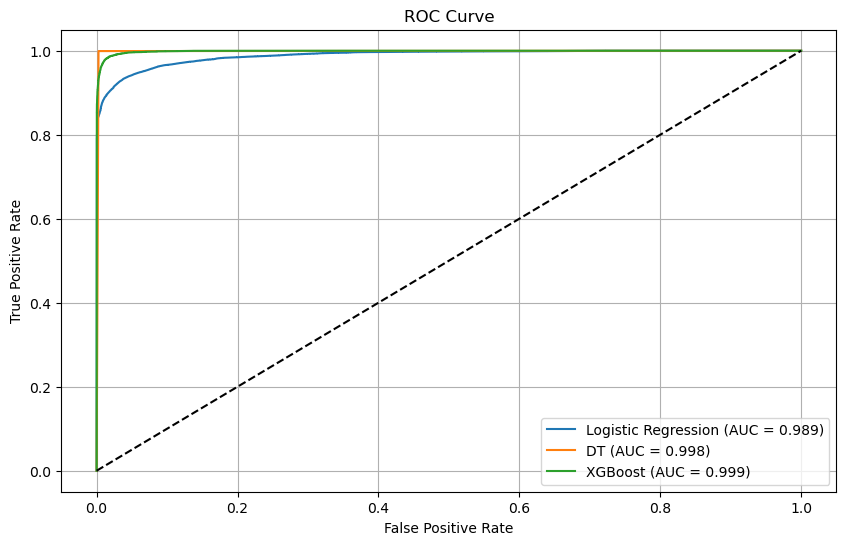

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
plt.plot(knn_fpr, knn_tpr, label=f'DT (AUC = {dt_model_curve_auc:.3f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- According to the analysis of **classification reports** and **AUC scores**, it's evident that the top-performing models for this problem are **Decision Tree** and **XGBoost**. These models demonstrate exceptional accuracy overall and exhibit strong capabilities in detecting fraud, as indicated by their high recall scores. Although **Logistic Regression** falls slightly behind in terms of fraud detection compared to the other two models, it still manages to achieve respectable overall accuracy.

- The **AUC scores** reveal that in the realm of distinguishing between fraudulent and genuine transactions, **XGBoost** leads with a remarkable score of **0.999**, closely trailed by **Decision Tree** at **0.998**. In contrast, **Logistic Regression** lags behind with a score of **0.989**. These findings emphasize the superior discriminatory prowess of **XGBoost** and **Decision Tree** models over **Logistic Regression** in this context.`


- After analyzing the outcomes, we suggest considering either **XGBoost** or **Decision Tree** for addressing this issue. Further evaluation can help determine which model to prioritize, taking into account factors like computational capacity and the level of interpretability desired.`

# <p id="1" style="text-align: center; padding: 15px; background-color:  #FDEBD0; font-size: 18px; border-radius: 10px; color: #1A202C; border: 2px solid #58D68D; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">5.5: Hyperparameter Tuning in XgBoost</p>

In [72]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_tun = xgb.XGBClassifier(max_depth=6,
                        learning_rate=0.05,
                        n_estimators=200,  
                        min_child_weight=2,
                        scale_pos_weight=0.5,
                        subsample=0.9 ,
                        colsample_bytree=0.5,
                        colsample_bylevel=0.8 ,
                        reg_alpha=0.05 ,
                        reg_lambda=0.1 ,
                        max_delta_step=2 ,
                        gamma=0.1,
                        random_state=0)

# fit the XGBoost classifier
xgb_tun.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=6, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [73]:
#predict the model
preds_tun = xgb_tun.predict(X_test)
preds_tun

array([1, 0, 0, ..., 1, 0, 0])

In [74]:
# checking Accuracy
accuracy_score(y_test,preds_tun)

0.9975287285308291

In [75]:
#import the confusion matrix from scikit learn
from sklearn.metrics import confusion_matrix
#create the confusion matrix
cm2 = confusion_matrix(y_test, preds_tun)
cm2

array([[56375,    88],
       [  192, 56647]], dtype=int64)

In [76]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm2
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))

precision 0.9984489292323963
recall 0.996622037685392


<div style="background-color: #C0D6E8; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <h3>XGBoost Model Evaluation (After Tuning)</h3>
    <ul style="list-style-type: square; color: #004085;">
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>99.75%</td>
            <td>The model correctly predicted transactions for 99.75% of the classes.</td>
        </tr>
        <tr>
            <td>Precision (Fraud)</td>
            <td>99.84%</td>
            <td>Out of all transactions predicted as fraud, only 99.84% were actually fraud.</td>
        </tr>
        <tr>
            <td>Recall (Fraud)</td>
            <td>99.66%</td>
            <td>The model identified 99.66% of the actual fraud transactions.</td>
        </tr>
    </table>
    </ul>
</div>

# <p id="1" style="text-align: center; padding: 15px; background-color: #FDEBD0; font-size: 18px; border-radius: 10px; color: #1A202C; border: 2px solid #58D68D; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">6: Result</p>


- After analyzing the outcomes, it's evident that leveraging **XGBoost** with **oversampled data** and **fine-tuned hyperparameters** yields superior results in identifying fraudulent transactions. This method consistently demonstrates high precision and recall rates across various folds, underscoring its resilience and accuracy in managing imbalanced datasets and delivering precise predictions.